# QF 625 Introduction to Programming

## Lesson 08 | An Introduction to Predictive Modeling Part 1 | `RE`view

### Problem Statement

> Identify your Y and X variables.

> Let's begin solving our problem.

> Let's import necessary packages first :)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd

%matplotlib inline

#### Key Variables (a.k.a., Features)

- `budget`: Wealth begets wealth, goes the old adage. For studios looking to make a splash, how important are the investment dollars put against a production?

- `studio`: Do movie production houses like Warner Bros. or Universal have a power of their own, besides the factors listed above?

- `season`: How does a release around Christmas or the summer vacation affect the outcomes of a movie?

- `opening`: Film industry experts love the `Opening Weekend` phenomenon, but just how much does the first 4 days of a movie's release truly matter?

- `opening theaters`: Does the scale of release during the opening weekend affect a movie?

- `rating`: Does how `good` the movie is actually matter? We leverage the [IMDb rating](https://www.imdb.com/) as a proxy for the `inherent level of quality` of the movie. 

- `mpaa`: For the kids, the parents, or the young adults?

### IMPORT

In [2]:
film = pd.read_csv("revenue_movies.csv")
film

,gross,rating,opening,mpaa,opening theaters,title,budget,rank,studio,year,close,open,season
0,"$515,005",NaN,"$220,542",NaN,102,A Hard Day's Night,560000.0,252,Jan.,2014,Jul-20,7-Apr,June-Sep
1,"$16,734",5.7,"$6,193",NaN,1,Inventing Our Life: The Kibbutz Experiment,NaN,513,FRun,2012,-,Apr-27,Jan-May
2,"$4,640",4.4,"$2,552",NaN,1,Hotel Normandy,NaN,624,Rialto,2013,11-Mar,Sep-27,June-Sep
3,"$42,024,533",6.4,"$15,873,397",Rated PG for some mild thematic elements,"3,656",Dolphin Tale 2,36000000.0,79,WB,2014,Dec-18,9-Dec,June-Sep
4,"$5,704,709",6.5,"$167,953",Rated R for sexual content and brief language,4,A Dangerous Method,20000000.0,152,SPC,2011,5-Mar,Nov-23,Oct-Nov
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3088,"$12,971",7.4,"$9,612",NaN,10,Bloodworth,NaN,520,Gold.,2011,May-26,May-20,Jan-May
3089,"$7,078",NaN,"$3,562",NaN,11,Stage Fright,NaN,613,Magn.,2014,6-May,5-Sep,Jan-May
3090,"$814,906",6.6,"$49,770",NaN,23,What If...,NaN,203,5&2,2010,Feb-24,Aug-20,June-Sep
3091,"$17,303,424",7.0,"$7,601,379",NaN,"2,655",Inkheart,60000000.0,114,WB (NL),2009,4-Sep,Jan-23,Jan-May


### Wrangle

> Let's cull the dataset down to ensure we have `non-null responses` in our keys variables

In [3]:
film = film.dropna(subset = ["budget", "mpaa", "opening", "season"])
film

,gross,rating,opening,mpaa,opening theaters,title,budget,rank,studio,year,close,open,season
3,"$42,024,533",6.4,"$15,873,397",Rated PG for some mild thematic elements,"3,656",Dolphin Tale 2,36000000.0,79,WB,2014,Dec-18,9-Dec,June-Sep
4,"$5,704,709",6.5,"$167,953",Rated R for sexual content and brief language,4,A Dangerous Method,20000000.0,152,SPC,2011,5-Mar,Nov-23,Oct-Nov
11,"$447,954",5.3,"$181,494","Rated R for sexual content, pervasive language...",47,Bachelorette,3000000.0,254,RTWC,2012,10-Nov,9-Jul,June-Sep
13,"$60,128,566",5.9,"$26,650,264",Rated R for sequences of strong violence and l...,"3,203",Resident Evil: Afterlife,57500000.0,55,SGem,2010,11-Apr,9-Oct,June-Sep
21,"$11,774",5.7,"$8,691","Rated R for violence throughout, and some sexu...",10,Falcon Rising,4500000.0,563,Free,2014,9-Nov,9-May,June-Sep
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3073,"$209,837,675",7.3,"$86,198,765",Rated PG-13 for intense sequences of violence ...,"3,644",Fast Five,125000000.0,6,Uni.,2011,8-Nov,Apr-29,Jan-May
3074,"$150,201,498",5.8,"$54,713,046",Rated PG-13 for strong sequences of action vio...,"4,007",G.I. Joe: The Rise of Cobra,175000000.0,18,Par.,2009,11-May,8-Jul,June-Sep
3075,"$27,693,292",6.0,"$14,118,444",Rated R for sequences of grisly bloody violenc...,"3,036",Saw VI,11000000.0,98,LGF,2009,Nov-24,Oct-23,Oct-Nov
3076,"$125,322,469",6.6,"$42,558,390",Rated PG-13 for intense sequences of sci-fi vi...,"3,530",Terminator Salvation,200000000.0,23,WB,2009,9-Oct,May-21,Jan-May


> Let's make sure that the number values are not in text format.

> I already gave you one way to do this in the previous lesson (yes, the gift).

> To expand your vocabulary in Python, here's another way to do the same task.

In [6]:
film["gross"].replace(regex = True, inplace = True, to_replace= r"\D", value = r"")

# Warning messages that you have received in our earlier lesson.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
film["opening"].replace(regex = True, inplace = True, to_replace = r"\D", value = r"")

In [9]:
film["opening theaters"].replace(regex = True, inplace = True, to_replace = r"\D", value = r"")
film

,gross,rating,opening,mpaa,opening theaters,title,budget,rank,studio,year,close,open,season
3,42024533,6.4,15873397,Rated PG for some mild thematic elements,3656,Dolphin Tale 2,36000000.0,79,WB,2014,Dec-18,9-Dec,June-Sep
4,5704709,6.5,167953,Rated R for sexual content and brief language,4,A Dangerous Method,20000000.0,152,SPC,2011,5-Mar,Nov-23,Oct-Nov
11,447954,5.3,181494,"Rated R for sexual content, pervasive language...",47,Bachelorette,3000000.0,254,RTWC,2012,10-Nov,9-Jul,June-Sep
13,60128566,5.9,26650264,Rated R for sequences of strong violence and l...,3203,Resident Evil: Afterlife,57500000.0,55,SGem,2010,11-Apr,9-Oct,June-Sep
21,11774,5.7,8691,"Rated R for violence throughout, and some sexu...",10,Falcon Rising,4500000.0,563,Free,2014,9-Nov,9-May,June-Sep
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3073,209837675,7.3,86198765,Rated PG-13 for intense sequences of violence ...,3644,Fast Five,125000000.0,6,Uni.,2011,8-Nov,Apr-29,Jan-May
3074,150201498,5.8,54713046,Rated PG-13 for strong sequences of action vio...,4007,G.I. Joe: The Rise of Cobra,175000000.0,18,Par.,2009,11-May,8-Jul,June-Sep
3075,27693292,6.0,14118444,Rated R for sequences of grisly bloody violenc...,3036,Saw VI,11000000.0,98,LGF,2009,Nov-24,Oct-23,Oct-Nov
3076,125322469,6.6,42558390,Rated PG-13 for intense sequences of sci-fi vi...,3530,Terminator Salvation,200000000.0,23,WB,2009,9-Oct,May-21,Jan-May


> Let's replace `empty values`

In [11]:
film.loc[film["opening"]=="", "opening"] = 0
film.loc[film["opening theaters"]=="", "opening theaters"] = 0

> Let's convert to float values for numerical variables

In [12]:
film["gross"] = film["gross"].astype(float)

In [13]:
film["opening"] = film["opening"].astype(float)
film["opening theaters"] = film["opening theaters"].astype(float)
film["budget"] = film["budget"].astype(float)
film["rating"] = film["rating"].astype(float)

> Let's recode season (it depends how you wish to define). For example...

In [14]:
film.loc[film["season"] == 0, "season"] = "Jan-May"
film.loc[film["season"] == 1, "season"] = "June-Sep"
film.loc[film["season"] == 2, "season"] = "Oct-Nov"
film.loc[film["season"] == 3, "season"] = "Dec"

> Let's create dummy variables for the various seasons

In [15]:
season_list = film.season.unique()

for season in season_list:
    film[season] = film["season"] == season

> Let's just simply create a MPAA rating variable. Let's take a simpler solution in the interest of time.

In [17]:
for i in film.index:
    try:
        film.loc[i, "mpaa_new"] = film.loc[i, "mpaa"].split("Rated ", 1)[1].split(" ")[0]
    except:
        film.loc[i, "mpaa_new"] = "PG-13"
film.loc[film["mpaa_new"] == "PG-", "mpaa_new"] = "PG"
film.loc[film["mpaa_new"] == "NC-17", "mpaa_new"] = "R"

> Let's create dummy variables for the various MPAA Ratings

In [18]:
mpaa_list = film.mpaa_new.unique()

for mpaa in mpaa_list:
    film[mpaa] = film["mpaa_new"] == mpaa

> Let's create a list of prolific studios

In [20]:
studio_df = film.groupby("studio")
studio_df

In [21]:
studios_list = studio_df["title"].count()
studios_list.sort_values(ascending = False)

studio
WB      88
Uni.    79
Fox     71
Sony    59
Par.    44
        ..
TFA      1
TRR      1
VE       1
Viv.     1
21CF     1
Name: title, Length: 67, dtype: int64

> Let's identify the top-5 studios

In [24]:
film["Top_Tier"] = False

for i in studios_list.index[:5]:
    film.loc[film["studio"] == i, "Top_Tier"] = True

> How would you identify the next 5 top studios

In [25]:
film["Tier_2"] = False

for i in studios_list.index[6:11]:
    film.loc[film["studio"] == i, "Tier_2"] = True

In [26]:
film

,gross,rating,opening,mpaa,opening theaters,title,budget,rank,studio,year,...,June-Sep,Oct-Nov,Jan-May,Dec,mpaa_new,PG,R,PG-13,Top_Tier,Tier_2
3,42024533.0,6.4,15873397.0,Rated PG for some mild thematic elements,3656.0,Dolphin Tale 2,36000000.0,79,WB,2014,...,True,False,False,False,PG,True,False,False,False,False
4,5704709.0,6.5,167953.0,Rated R for sexual content and brief language,4.0,A Dangerous Method,20000000.0,152,SPC,2011,...,False,True,False,False,R,False,True,False,False,False
11,447954.0,5.3,181494.0,"Rated R for sexual content, pervasive language...",47.0,Bachelorette,3000000.0,254,RTWC,2012,...,True,False,False,False,R,False,True,False,False,False
13,60128566.0,5.9,26650264.0,Rated R for sequences of strong violence and l...,3203.0,Resident Evil: Afterlife,57500000.0,55,SGem,2010,...,True,False,False,False,R,False,True,False,False,False
21,11774.0,5.7,8691.0,"Rated R for violence throughout, and some sexu...",10.0,Falcon Rising,4500000.0,563,Free,2014,...,True,False,False,False,R,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3073,209837675.0,7.3,86198765.0,Rated PG-13 for intense sequences of violence ...,3644.0,Fast Five,125000000.0,6,Uni.,2011,...,False,False,True,False,PG-13,False,False,True,False,False
3074,150201498.0,5.8,54713046.0,Rated PG-13 for strong sequences of action vio...,4007.0,G.I. Joe: The Rise of Cobra,175000000.0,18,Par.,2009,...,True,False,False,False,PG-13,False,False,True,False,False
3075,27693292.0,6.0,14118444.0,Rated R for sequences of grisly bloody violenc...,3036.0,Saw VI,11000000.0,98,LGF,2009,...,False,True,False,False,R,False,True,False,False,False
3076,125322469.0,6.6,42558390.0,Rated PG-13 for intense sequences of sci-fi vi...,3530.0,Terminator Salvation,200000000.0,23,WB,2009,...,False,False,True,False,PG-13,False,False,True,False,False


> Let's rename the columns for use later :)

In [27]:
film.rename(columns = {"gross": "revenue", 
                       "opening theaters": "opening_theaters",
                       "opening": "opening_gross"},
      inplace = True)
film

,revenue,rating,opening_gross,mpaa,opening_theaters,title,budget,rank,studio,year,...,June-Sep,Oct-Nov,Jan-May,Dec,mpaa_new,PG,R,PG-13,Top_Tier,Tier_2
3,42024533.0,6.4,15873397.0,Rated PG for some mild thematic elements,3656.0,Dolphin Tale 2,36000000.0,79,WB,2014,...,True,False,False,False,PG,True,False,False,False,False
4,5704709.0,6.5,167953.0,Rated R for sexual content and brief language,4.0,A Dangerous Method,20000000.0,152,SPC,2011,...,False,True,False,False,R,False,True,False,False,False
11,447954.0,5.3,181494.0,"Rated R for sexual content, pervasive language...",47.0,Bachelorette,3000000.0,254,RTWC,2012,...,True,False,False,False,R,False,True,False,False,False
13,60128566.0,5.9,26650264.0,Rated R for sequences of strong violence and l...,3203.0,Resident Evil: Afterlife,57500000.0,55,SGem,2010,...,True,False,False,False,R,False,True,False,False,False
21,11774.0,5.7,8691.0,"Rated R for violence throughout, and some sexu...",10.0,Falcon Rising,4500000.0,563,Free,2014,...,True,False,False,False,R,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3073,209837675.0,7.3,86198765.0,Rated PG-13 for intense sequences of violence ...,3644.0,Fast Five,125000000.0,6,Uni.,2011,...,False,False,True,False,PG-13,False,False,True,False,False
3074,150201498.0,5.8,54713046.0,Rated PG-13 for strong sequences of action vio...,4007.0,G.I. Joe: The Rise of Cobra,175000000.0,18,Par.,2009,...,True,False,False,False,PG-13,False,False,True,False,False
3075,27693292.0,6.0,14118444.0,Rated R for sequences of grisly bloody violenc...,3036.0,Saw VI,11000000.0,98,LGF,2009,...,False,True,False,False,R,False,True,False,False,False
3076,125322469.0,6.6,42558390.0,Rated PG-13 for intense sequences of sci-fi vi...,3530.0,Terminator Salvation,200000000.0,23,WB,2009,...,False,False,True,False,PG-13,False,False,True,False,False


### Exploratory Data Analysis (EDA)

In [29]:
import seaborn as sns

> Let's create our first plot that assesses the relationship between `Gross Revenue` and `Opening Weekend Revenue`

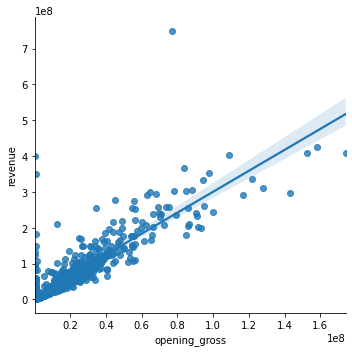

In [30]:
sns.lmplot(y = "revenue", x="opening_gross", data = film, fit_reg = True)

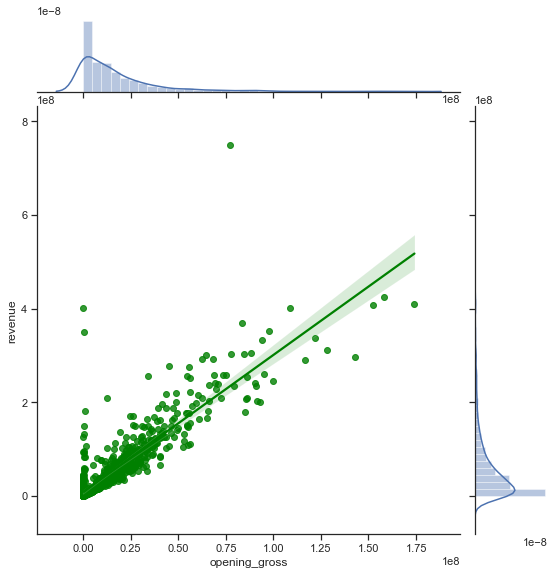

In [35]:
sns.set(style = "ticks")

sns.jointplot(y = "revenue",
              x = "opening_gross",
              data = film,
              kind = "reg",
              joint_kws = {"color": "green"},
              height = 8)

> Let's also take a look at the relationship between the `gross revenue` and `the number of opening theaters`

<AxesSubplot:xlabel='opening_theaters', ylabel='revenue'>

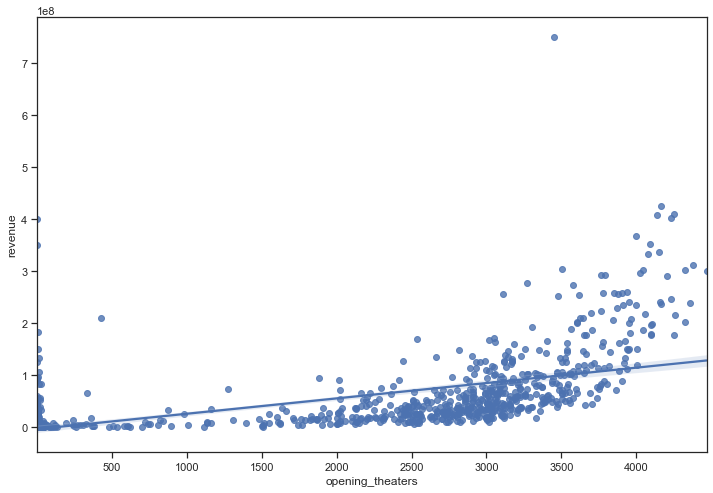

In [36]:
plt.figure(figsize = (12, 8))
sns.regplot(y = "revenue", x = "opening_theaters", data = film, fit_reg = True)

> `Interpretation?`

- The relatinship is positive, but not linear.

- There's a sharp upward curve at around 3,000 theaters, which is an important finding for movie houses to consider.

> Let's assess the relationship between a movie's `gross revenue` and its allocated `budget`

<AxesSubplot:xlabel='budget', ylabel='revenue'>

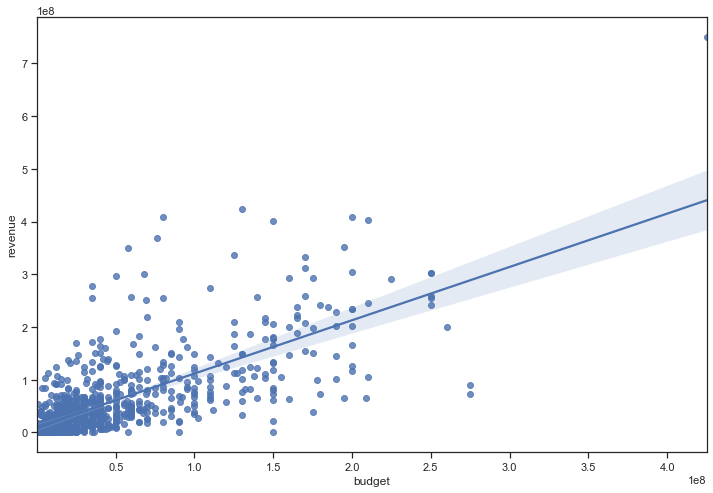

In [37]:
plt.figure(figsize = (12, 8))
sns.regplot(y = "revenue", x = "budget", data = film, fit_reg = True)

> `Interpretation?`

- The relationship look like, although there seems to be a side dispersion, especially the further one goes out in revenue/budget.

> Let's further examine how the `gross revenue` increases with `IMDb rating`

<AxesSubplot:xlabel='rating', ylabel='revenue'>

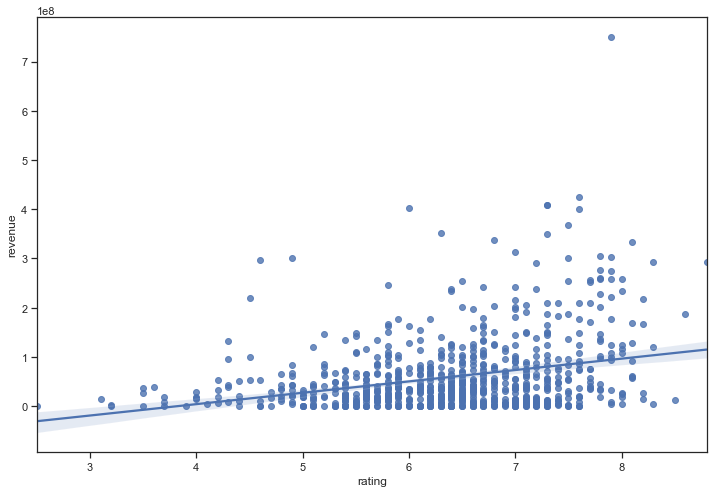

In [39]:
plt.figure(figsize = (12, 8))
sns.regplot(y = "revenue", x = "rating", data = film, fit_reg = True)

> `Interpretation?`

- While there is an upward trend, it is a flat, indicating that the revenue is NOT strongly dependent upon the rating and perhaps the quality of the movie therein.

> You might want to generate a `diagonal correlational matrix` :)

<AxesSubplot:>

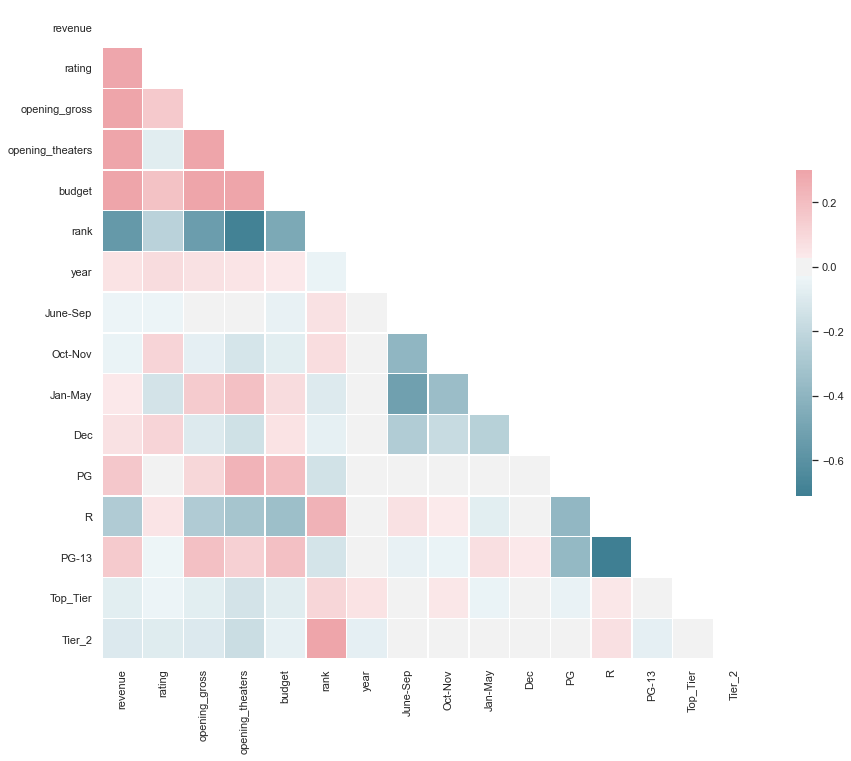

In [48]:
sns.set(style = "white")

corr = film.corr()

mask = np.triu(np.ones_like(corr, dtype = np.bool))

f, ax = plt.subplots(figsize = (15, 12))

cmap = sns.diverging_palette(220, 10, as_cmap = True) # -1 through 1

sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5})

### Modeling Using Statsmodel

> Having explored the data to some degree, let's dive into multiple models that look at how the `gross revenue` of a movie might be associated with the factors discussed in the beginning.

> Given the `limited number of features`, using `Statsmodel` would be the ideal tool to leverage. 

> Let's examine whether there are any differences from the `sklearn` analysis.

##### Let's create train and test datasets to leverage later

In [41]:
import sklearn
from sklearn.model_selection import train_test_split # cross_validation is deprecated 

In [42]:
itrain, itest = train_test_split(range(film.shape[0]), train_size = 0.6)
mask = np.ones(film.shape[0], dtype = "int")
mask[itrain] = 1
mask[itest] = 0
mask = (mask == 1)

In [43]:
from statsmodels.formula.api import ols

> Let's specify model that leverages only three variables (counting season as a single variable)

$$ \widehat{revenue} = b_0 + b_1budget + b_2theaters + b_3season + \epsilon $$

In [44]:
m1 = ols("revenue ~ budget + opening_theaters + season", film[mask]).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     137.8
Date:                Mon, 07 Sep 2020   Prob (F-statistic):           1.86e-90
Time:                        15:13:33   Log-Likelihood:                -9300.2
No. Observations:                 487   AIC:                         1.861e+04
Df Residuals:                     481   BIC:                         1.864e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           6.169e+06    6.9e+06      0.894      0.372   -7.39e+06    1.97e+07
season[T.Jan-May]  -1.985e+07   7.63e+06     -2.603      0.010   -3.48e+07   -4.87e+06
season[T.June-Sep] -1.608e+07   7.52e+06     -2.137      0.033   -3.09e+07    -1.3e+06
season[T.Oct-Nov]  -8.745e+06   7.99e+06     -1.094      0.274   -2.44e+07    6.96e+06
budget                 0.8602      0.051     16.936      0.000       0.760       0.960
opening_theaters    1.101e+04   1987.106      5.539      0.000    7102.118    1.49e+04
==============================================================================
Omnibus:                      267.841   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3447.066
Skew:                           2.095   Prob(JB):                         0.00
Kurtosis:                      15.342   Cond. No.                     4.46e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.46e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> `Interpretation?`

- The R-squared associated with this model is about average, with plenty of unexplained variance in the data.

- As an intial model, it seems to raise an interesting question regarding the role of budget.


> Model 2 adds in the gross revenue for the opening weekend. 

In [45]:
m2 = ols("revenue ~ budget + opening_theaters + season + opening_gross", film[mask]).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     378.1
Date:                Mon, 07 Sep 2020   Prob (F-statistic):          2.64e-178
Time:                        15:17:32   Log-Likelihood:                -9091.7
No. Observations:                 487   AIC:                         1.820e+04
Df Residuals:                     480   BIC:                         1.823e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.857e+07   4.59e+06      6.226      0.000    1.96e+07    3.76e+07
season[T.Jan-May]  -3.252e+07      5e+06     -6.505      0.000   -4.23e+07   -2.27e+07
season[T.June-Sep] -2.543e+07   4.92e+06     -5.166      0.000   -3.51e+07   -1.58e+07
season[T.Oct-Nov]  -2.142e+07   5.24e+06     -4.088      0.000   -3.17e+07   -1.11e+07
budget                 0.3034      0.040      7.645      0.000       0.225       0.381
opening_theaters   -3657.9811   1418.383     -2.579      0.010   -6444.988    -870.974
opening_gross          2.7327      0.107     25.493      0.000       2.522       2.943
==============================================================================
Omnibus:                      551.914   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65165.658
Skew:                           4.977   Prob(JB):                         0.00
Kurtosis:                      58.789   Cond. No.                     4.72e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.72e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> `Interpretation?`

- The coefficient on the variable `opening theaters` is reversed, which implies that adding in the gross opening weekend has exposed the non-linear relationship.

- In addition, there is likely correlation between the opening weekend gross and the number of opening theaters.

> Let's run Model 3 that incorporates whether the movie was part of a big studio

> According to the results, ...?

> Model 5 (appears to have the best results, with the minimum required variables.

> Now, let's compare the results of our Model 1 through Model 4 by testing the observed vs. Predicted fits.

> Let's create a non-parametric lowess curve that attempts to be a comparison to help us determine how well the line of best fit describes the true nature of the data.

> Let's run some assumption checks for linear model.

> `Interpretation?`

> How about Model 4?

> `Interpretation?`

### Modeling with SKlearn as an analysis alternative

> Let's create a LinearRegression object

> Let's fit the outcome gross revenue variable on this model

> The coefficients?

##### Let's create a train/test set to rework lm and calculate Mean Squared Error (MSE)

> Let's create a set of training and test data

> Let's fit our training data to the model specified above.

> Considering the MSE of our model on the fit versus train data

##### Interpretation?

> Let's visualize the results of our model against the residuals

> Aside from the strong clustering of data points towards the left (lower) end of the spectrum, there generally appears to be equally distributed residuals

### Employ `sklearn` to analyze models of increasing complexity while continuing to tune parameters

> 

Please run the following lines of code :)
    
```Python 

```
    

> Model 1: A budget-only model as the baseline

In [ ]:
reg_1 = Lasso()

> `Interpretation?`

> Let's incorporate the number of openings theaters as an additional predictor

> Then, let's add opening weekend revenue

> Let's add the season that the movie was released in

> Let's includes the studio, in the form of 'Top_Tier' which measures if the studio is in the top 5 prolific studios in the industry

> Now, With Tier_2 studio added in there to see if the movie belonging to any of the top 10 studios has an effect

> How about adding MPAA Rating to the model

> Lastly, let's add IMDb Movie Rating

> Let's compare the output of the above models with the models received from the Statsmodel analysis :)

> Let's compile the results from the sklearn variable

> Let's have a look at the coefficients

> `Interpretation?`

### Results and Discussion

> The series of analyses have yielded interesting results--below are some implications we could draw.


> `Thank you for working with the script :)`

In [ ]:
exit()